In this part, we will calculate abnormal returns that we will try to predict for the recalls.

$AR_{it} = R_{it} - E[R_{it}]$

$AR_{it}$ : abnormal return for firm i on day t

$R_{it}$ : actual return for firm i on day t 

$E[R_{it}]$ : expected return for firm i on day t 

In fact, we will use cumulative abnormal return over a window of 10 days which will represent in a better way the impact of the recall on the stock price of the firm.

To determine expected return, we will use Capital Asset Pricing Model (CAPM) :

$E[R_{it}] = R_f + \beta_i(E[R_{mt}] - R_f)$

$R_f$ : Risk-free rate

$E[R_{mt}]$ : return expected from the market above the risk-free rate 

$\beta_i$ : represents how much risk the investment will add to a portfolio that looks like the market.

$\beta_i$ is defined as : $\beta_i = \frac{Cov(R_i, R_m)}{Var(R_m)}$

In a linear regression, it represents the slope coefficient : if it is higher than one, the stock price tends to increase/decrease more than the the market return. If it is lower than 1, it tends to increase/decrease less than the market return. In other word, it is a parameter that deduces the 'normal" return of a stock from the market return.

Therefore, to get the "normal" returns, we just need to fit a linear regression between the market return (x) and the stock (return) : the risk-free rate represents the intercept and the value of stock return on the line reprsents its "normal" value.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import statsmodels.api as sm

In [0]:
tickers = ["000270.KS", "7261.T", "F", "GM", "005380.KS", "RACE", "NSANY", "UG.PA", "RNO.PA", "7269.T", "TSLA", "TM", "VWAGY", "^GSPC", "^FCHI", "^IXIC", "OTCM", "CPR.MI", "^NYA", "LSE.L", "DAI.DE", "FCAU", "BMW.DE", "TTM", "HMC", "VOLV-A.ST", "^OMX", "8035.T", "^GDAXI", "^KS11"]
multpl_stocks = web.get_data_yahoo(tickers,
start = "1990-01-01",
end = "2020-01-01")['Adj Close']

In [0]:
multpl_stock_daily_returns = multpl_stocks.pct_change()
multpl_stock_monthly_returns = multpl_stocks.resample('M').ffill().pct_change()

In [5]:
multpl_stock_daily_returns

Symbols,000270.KS,7261.T,F,GM,005380.KS,RACE,NSANY,UG.PA,RNO.PA,7269.T,TSLA,TM,VWAGY,^GSPC,^FCHI,^IXIC,OTCM,CPR.MI,^NYA,LSE.L,DAI.DE,FCAU,BMW.DE,TTM,HMC,VOLV-A.ST,^OMX,8035.T,^GDAXI,^KS11
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,0.005525,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.003571,NaN,-0.002586,NaN,0.003484,NaN,NaN,-0.001013,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,NaN,NaN,0.043826,NaN
1990-01-04,NaN,NaN,0.000000,NaN,NaN,NaN,0.018519,NaN,NaN,NaN,NaN,0.014235,NaN,-0.008613,NaN,-0.003255,NaN,NaN,-0.007631,NaN,NaN,NaN,NaN,NaN,0.024876,NaN,NaN,NaN,-0.019477,NaN
1990-01-05,NaN,NaN,-0.013737,NaN,NaN,NaN,-0.024243,NaN,NaN,NaN,NaN,-0.014035,NaN,-0.009756,NaN,-0.002612,NaN,NaN,-0.008408,NaN,NaN,NaN,NaN,NaN,0.009708,NaN,NaN,NaN,-0.009842,NaN
1990-01-08,NaN,NaN,0.000000,NaN,NaN,NaN,0.012423,NaN,NaN,NaN,NaN,0.003559,NaN,0.004514,NaN,0.001091,NaN,NaN,0.003547,NaN,NaN,NaN,NaN,NaN,-0.009615,NaN,NaN,NaN,0.015759,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.008949,0.004320,-0.002112,-0.002734,0.004098,0.000357,-0.023589,0.000000,0.000000,-0.000434,0.013380,0.001344,0.005211,0.005128,0.000000,0.007764,-0.004340,0.000000,0.003259,0.000000,0.000000,0.003381,0.000000,0.003247,0.003489,0.000000,0.000000,0.011613,0.000000,0.003584
2019-12-27,-0.016630,0.012903,-0.009524,0.002193,-0.016327,0.003867,0.000000,-0.000458,-0.005435,0.001302,-0.001299,-0.001766,0.005702,0.000034,0.001300,-0.001748,0.000000,-0.003617,0.000267,0.010417,0.001105,0.002022,-0.000408,-0.003236,-0.006259,0.002505,0.001325,-0.003340,0.002716,0.002857
2019-12-30,-0.001127,-0.004246,-0.011752,-0.003282,0.000000,-0.020270,-0.004314,-0.011457,-0.009302,-0.010401,-0.036433,-0.004742,-0.011237,-0.005781,-0.009138,-0.006732,0.001744,-0.015124,-0.004876,-0.005670,-0.009430,-0.012105,-0.005033,0.036526,-0.010847,-0.011868,-0.014566,0.002094,-0.006606,-0.002967


In [6]:
multpl_stock_daily_returns.columns

Index(['000270.KS', '7261.T', 'F', 'GM', '005380.KS', 'RACE', 'NSANY', 'UG.PA',
       'RNO.PA', '7269.T', 'TSLA', 'TM', 'VWAGY', '^GSPC', '^FCHI', '^IXIC',
       'OTCM', 'CPR.MI', '^NYA', 'LSE.L', 'DAI.DE', 'FCAU', 'BMW.DE', 'TTM',
       'HMC', 'VOLV-A.ST', '^OMX', '8035.T', '^GDAXI', '^KS11'],
      dtype='object', name='Symbols')

In [7]:
multpl_stock_daily_returns['HMC']

Date
1990-01-02         NaN
1990-01-03    0.005000
1990-01-04    0.024876
1990-01-05    0.009708
1990-01-08   -0.009615
                ...   
2019-12-26    0.003489
2019-12-27   -0.006259
2019-12-30   -0.010847
2019-12-31    0.001415
2020-01-02    0.000000
Name: HMC, Length: 7813, dtype: float64

<Figure size 432x288 with 0 Axes>

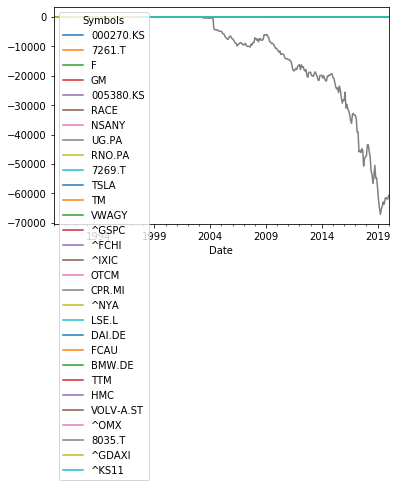

In [8]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

In [9]:
#Annual variance of the S&P 500
market_var = multpl_stock_daily_returns['^GSPC'].var() * 250
market_var

0.02913357240600316

Reference indexes have low variance : they are a good referrence

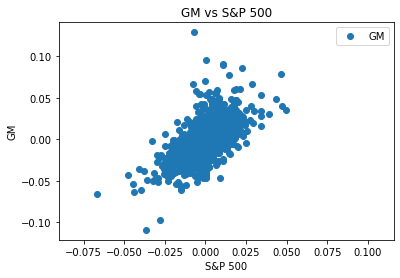

In [10]:
#plt.scatter(multpl_stock_daily_returns['BMW.MI'], multpl_stock_daily_returns['^GSPC'])
#dataset.plot(x=multpl_stock_daily_returns['^GSPC'], y=multpl_stock_daily_returns['GM'], style='o') 
multpl_stock_daily_returns.plot(x='^GSPC', y='GM', style='o')
plt.title('GM vs S&P 500')  
plt.xlabel('S&P 500')  
plt.ylabel('GM')  
plt.show()

We can see a kind of linear relationship between a stock value and a reference index value

In [11]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from statsmodels import regression

#Plusieurs indices de références existent (un par marché)

dax = pd.DataFrame(multpl_stock_daily_returns['^GDAXI'])
otc = pd.DataFrame(multpl_stock_daily_returns['OTCM'])
nyse = pd.DataFrame(multpl_stock_daily_returns['^NYA'])
nasdaq = pd.DataFrame(multpl_stock_daily_returns['^IXIC'])
cac40 = pd.DataFrame(multpl_stock_daily_returns['^FCHI'])
lse = pd.DataFrame(multpl_stock_daily_returns['LSE.L'])
tokyo = pd.DataFrame(multpl_stock_daily_returns['8035.T'])
korea = pd.DataFrame(multpl_stock_daily_returns['^KS11'])
stockholm = pd.DataFrame(multpl_stock_daily_returns['^OMX'])


#mask = ~np.isnan(nyse) 

#nyse[mask].dropna(axis=0) #OK

y = pd.DataFrame(multpl_stock_daily_returns['F'])
#mask = ~np.isnan(y)

#y[mask].dropna(axis=0)

#mask = ~(np.isnan(nyse) & ~np.isnan(y))
#y[mask].dropna(axis=0)
#nyse[mask].dropna(axis=0)

model = sm.OLS(y, nyse, missing='drop')
results = model.fit()

results.predict(y)


Date
1990-01-02         NaN
1990-01-03    0.006602
1990-01-04    0.000000
1990-01-05   -0.016413
1990-01-08    0.000000
                ...   
2019-12-26   -0.002524
2019-12-27   -0.011379
2019-12-30   -0.014042
2019-12-31    0.006459
2020-01-02    0.000000
Length: 7813, dtype: float64

We can see that the linear regression works well on an example

In [0]:
import statsmodels.api as sm
from numpy import NaN

#eurostoxx = pd.DataFrame(multpl_stock_daily_returns['^STOXX50E'])

list_otc = ['MSDAY', 'HYMTF', 'NSANY', 'SZKMY', 'VWAGY', 'VLVLY']
list_nyse = ['F', 'GM', 'RACE', 'TM', 'FCAU', 'TTM', 'HMC']
list_nasdaq = ['TSLA']
list_cac40 = ['UG.PA', 'RNO.PA', ]
list_dax = ['DAI.DE', 'BMW.DE']
list_tokyo = ['7261.T', '7269.T'] #mazda et suzuki
list_korea = ['000270.KS', '005380.KS']
list_stockholm = ['VOLV-A.ST']

for col in multpl_stock_daily_returns:
    if col[0]!='^' and col != 'CPR.MI' and col != 'OTCM' and col != '8035.T':
        #reg = XGBRegressor()
        #reg = LinearRegression()
        y = pd.DataFrame(multpl_stock_daily_returns[str(col)])
        if col in list_dax: 
            #mask = ~(np.isnan(milan) & np.isnan(y))
            #reg.fit(milan[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, dax, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(dax)
        elif col in list_otc:
            #mask = ~(np.isnan(otc) & np.isnan(y))
            #reg.fit(otc[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, otc, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(otc)
        elif col in list_nyse:
            #mask = ~(np.isnan(nyse) & np.isnan(y))
            #reg.fit(nyse[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, nyse, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(nyse)
        elif col in list_nasdaq:
            #mask = ~(np.isnan(nasdaq) & np.isnan(y))
            #reg.fit(nasdaq[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, nasdaq, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(nasdaq)
        elif col in list_cac40:
            #mask = ~(np.isnan(cac40) & np.isnan(y))
            #reg.fit(cac40[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, cac40, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(cac40)
        elif col in list_tokyo:
            #mask = ~(np.isnan(lse) & np.isnan(y))
            #reg.fit(lse[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, tokyo, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(tokyo)
        elif col in list_korea:
            #mask = ~(np.isnan(lse) & np.isnan(y))
            #reg.fit(lse[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, korea, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(korea)
        elif col in list_stockholm:
            #mask = ~(np.isnan(lse) & np.isnan(y))
            #reg.fit(lse[mask].dropna(axis=0), y[mask].dropna(axis=0))
            reg = sm.OLS(y, stockholm, missing='drop').fit()
            multpl_stock_daily_returns[str(col+" Expected Return")] = reg.predict(stockholm)


In [13]:
multpl_stock_daily_returns

Symbols,000270.KS,7261.T,F,GM,005380.KS,RACE,NSANY,UG.PA,RNO.PA,7269.T,TSLA,TM,VWAGY,^GSPC,^FCHI,^IXIC,OTCM,CPR.MI,^NYA,LSE.L,DAI.DE,FCAU,BMW.DE,TTM,HMC,VOLV-A.ST,^OMX,8035.T,^GDAXI,^KS11,000270.KS Expected Return,7261.T Expected Return,F Expected Return,GM Expected Return,005380.KS Expected Return,RACE Expected Return,NSANY Expected Return,UG.PA Expected Return,RNO.PA Expected Return,7269.T Expected Return,TSLA Expected Return,TM Expected Return,VWAGY Expected Return,DAI.DE Expected Return,FCAU Expected Return,BMW.DE Expected Return,TTM Expected Return,HMC Expected Return,VOLV-A.ST Expected Return
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,0.005525,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.003571,NaN,-0.002586,NaN,0.003484,NaN,NaN,-0.001013,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,NaN,NaN,0.043826,NaN,NaN,NaN,-0.001210,-0.001221,NaN,-0.001343,NaN,NaN,NaN,NaN,0.004412,-0.000797,NaN,0.047731,-0.001013,0.042060,-0.001284,-0.000860,NaN
1990-01-04,NaN,NaN,0.000000,NaN,NaN,NaN,0.018519,NaN,NaN,NaN,NaN,0.014235,NaN,-0.008613,NaN,-0.003255,NaN,NaN,-0.007631,NaN,NaN,NaN,NaN,NaN,0.024876,NaN,NaN,NaN,-0.019477,NaN,NaN,NaN,-0.009118,-0.009199,NaN,-0.010121,NaN,NaN,NaN,NaN,-0.004122,-0.006005,NaN,-0.021213,-0.007636,-0.018693,-0.009679,-0.006484,NaN
1990-01-05,NaN,NaN,-0.013737,NaN,NaN,NaN,-0.024243,NaN,NaN,NaN,NaN,-0.014035,NaN,-0.009756,NaN,-0.002612,NaN,NaN,-0.008408,NaN,NaN,NaN,NaN,NaN,0.009708,NaN,NaN,NaN,-0.009842,NaN,NaN,NaN,-0.010046,-0.010135,NaN,-0.011151,NaN,NaN,NaN,NaN,-0.003308,-0.006616,NaN,-0.010719,-0.008413,-0.009445,-0.010664,-0.007143,NaN
1990-01-08,NaN,NaN,0.000000,NaN,NaN,NaN,0.012423,NaN,NaN,NaN,NaN,0.003559,NaN,0.004514,NaN,0.001091,NaN,NaN,0.003547,NaN,NaN,NaN,NaN,NaN,-0.009615,NaN,NaN,NaN,0.015759,NaN,NaN,NaN,0.004238,0.004276,NaN,0.004704,NaN,NaN,NaN,NaN,0.001382,0.002791,NaN,0.017164,0.003549,0.015124,0.004499,0.003014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.008949,0.004320,-0.002112,-0.002734,0.004098,0.000357,-0.023589,0.000000,0.000000,-0.000434,0.013380,0.001344,0.005211,0.005128,0.000000,0.007764,-0.004340,0.000000,0.003259,0.000000,0.000000,0.003381,0.000000,0.003247,0.003489,0.000000,0.000000,0.011613,0.000000,0.003584,0.003472,0.004410,0.003894,0.003928,0.003871,0.004322,-0.000256,0.000000,0.000000,0.003606,0.009833,0.002564,-0.000253,0.000000,0.003261,0.000000,0.004133,0.002769,0.000000
2019-12-27,-0.016630,0.012903,-0.009524,0.002193,-0.016327,0.003867,0.000000,-0.000458,-0.005435,0.001302,-0.001299,-0.001766,0.005702,0.000034,0.001300,-0.001748,0.000000,-0.003617,0.000267,0.010417,0.001105,0.002022,-0.000408,-0.003236,-0.006259,0.002505,0.001325,-0.003340,0.002716,0.002857,0.002768,-0.001268,0.000319,0.000322,0.003086,0.000354,0.000000,0.001278,0.001490,-0.001037,-0.002214,0.000210,0.000000,0.002958,0.000267,0.002607,0.000338,0.000227,0.001763
2019-12-30,-0.001127,-0.004246,-0.011752,-0.003282,0.000000,-0.020270,-0.004314,-0.011457,-0.009302,-0.010401,-0.036433,-0.004742,-0.011237,-0.005781,-0.009138,-0.006732,0.001744,-0.015124,-0.004876,-0.005670,-0.009430,-0.012105,-0.005033,0.036526,-0.010847,-0.011868,-0.014566,0.002094,-0.006606,-0.002967,-0.002874,0.000795,-0.005826,-0.005878,-0.003204,-0.006467,0.000103,-0.008982,-0.010469,0.000650,-0.008526,-0.003837,0.000102,-0.007194,-0.004879,-0.006339,-0.006184,-0.004143,-0.019372


In [0]:
#multpl_stock_daily_returns[['GM', 'GM Expected Return']].plot(kind='bar',figsize=(16,10))

In [0]:
list_return=[]
list_expected=[]
for col in multpl_stock_daily_returns:
    if col[0]!='^' and col != 'CPR.MI' and col != 'OTCM' and col != '8035.T':
        if "Expected Return" in col:
            list_expected.append(str(col))
        else :
            list_return.append(str(col))

In [0]:
for marque in list_return:
    for expect in list_expected:
        if marque in expect.split()[0]:
            multpl_stock_daily_returns[str(marque +" Abnormal Returns")]= np.abs(multpl_stock_daily_returns[str(expect)] - multpl_stock_daily_returns[str(marque)]) 

In [17]:
multpl_stock_daily_returns

Symbols,000270.KS,7261.T,F,GM,005380.KS,RACE,NSANY,UG.PA,RNO.PA,7269.T,TSLA,TM,VWAGY,^GSPC,^FCHI,^IXIC,OTCM,CPR.MI,^NYA,LSE.L,DAI.DE,FCAU,BMW.DE,TTM,HMC,VOLV-A.ST,^OMX,8035.T,^GDAXI,^KS11,000270.KS Expected Return,7261.T Expected Return,F Expected Return,GM Expected Return,005380.KS Expected Return,RACE Expected Return,NSANY Expected Return,UG.PA Expected Return,RNO.PA Expected Return,7269.T Expected Return,TSLA Expected Return,TM Expected Return,VWAGY Expected Return,DAI.DE Expected Return,FCAU Expected Return,BMW.DE Expected Return,TTM Expected Return,HMC Expected Return,VOLV-A.ST Expected Return,000270.KS Abnormal Returns,7261.T Abnormal Returns,F Abnormal Returns,GM Abnormal Returns,005380.KS Abnormal Returns,RACE Abnormal Returns,NSANY Abnormal Returns,UG.PA Abnormal Returns,RNO.PA Abnormal Returns,7269.T Abnormal Returns,TSLA Abnormal Returns,TM Abnormal Returns,VWAGY Abnormal Returns,DAI.DE Abnormal Returns,FCAU Abnormal Returns,BMW.DE Abnormal Returns,TTM Abnormal Returns,HMC Abnormal Returns,VOLV-A.ST Abnormal Returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,0.005525,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.003571,NaN,-0.002586,NaN,0.003484,NaN,NaN,-0.001013,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,NaN,NaN,0.043826,NaN,NaN,NaN,-0.001210,-0.001221,NaN,-0.001343,NaN,NaN,NaN,NaN,0.004412,-0.000797,NaN,0.047731,-0.001013,0.042060,-0.001284,-0.000860,NaN,NaN,NaN,0.006538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004856,NaN,NaN,NaN,NaN,NaN,0.005860,NaN
1990-01-04,NaN,NaN,0.000000,NaN,NaN,NaN,0.018519,NaN,NaN,NaN,NaN,0.014235,NaN,-0.008613,NaN,-0.003255,NaN,NaN,-0.007631,NaN,NaN,NaN,NaN,NaN,0.024876,NaN,NaN,NaN,-0.019477,NaN,NaN,NaN,-0.009118,-0.009199,NaN,-0.010121,NaN,NaN,NaN,NaN,-0.004122,-0.006005,NaN,-0.021213,-0.007636,-0.018693,-0.009679,-0.006484,NaN,NaN,NaN,0.007636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023914,NaN,NaN,NaN,NaN,NaN,0.031360,NaN
1990-01-05,NaN,NaN,-0.013737,NaN,NaN,NaN,-0.024243,NaN,NaN,NaN,NaN,-0.014035,NaN,-0.009756,NaN,-0.002612,NaN,NaN,-0.008408,NaN,NaN,NaN,NaN,NaN,0.009708,NaN,NaN,NaN,-0.009842,NaN,NaN,NaN,-0.010046,-0.010135,NaN,-0.011151,NaN,NaN,NaN,NaN,-0.003308,-0.006616,NaN,-0.010719,-0.008413,-0.009445,-0.010664,-0.007143,NaN,NaN,NaN,0.005324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003371,NaN,NaN,NaN,NaN,NaN,0.016852,NaN
1990-01-08,NaN,NaN,0.000000,NaN,NaN,NaN,0.012423,NaN,NaN,NaN,NaN,0.003559,NaN,0.004514,NaN,0.001091,NaN,NaN,0.003547,NaN,NaN,NaN,NaN,NaN,-0.009615,NaN,NaN,NaN,0.015759,NaN,NaN,NaN,0.004238,0.004276,NaN,0.004704,NaN,NaN,NaN,NaN,0.001382,0.002791,NaN,0.017164,0.003549,0.015124,0.004499,0.003014,NaN,NaN,NaN,0.003549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000940,NaN,NaN,NaN,NaN,NaN,0.012629,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.008949,0.004320,-0.002112,-0.002734,0.004098,0.000357,-0.023589,0.000000,0.000000,-0.000434,0.013380,0.001344,0.005211,0.005128,0.000000,0.007764,-0.004340,0.000000,0.003259,0.000000,0.000000,0.003381,0.000000,0.003247,0.003489,0.000000,0.000000,0.011613,0.000000,0.003584,0.003472,0.004410,0.003894,0.003928,0.003871,0.004322,-0.000256,0.000000,0.000000,0.003606,0.009833,0.002564,-0.000253,0.000000,0.003261,0.000000,0.004133,0.002769,0.000000,0.005477,0.000090,0.005373,0.006662,0.000228,0.003965,0.023333,0.000000,0.000000,0.004040,0.003547,0.002789,0.005464,0.000000,0.000120,0.000000,0.000887,0.000720,0.000000
2019-12-27,-0.016630,0.012903,-0.009524,0.002193,-0.016327,0.003867,0.000000,-0.000458,-0.005435,0.001

In [0]:
#multpl_stock_daily_returns['GM Abnormal Returns'].plot(kind='bar',figsize=(16,10))

In [0]:
#On va ajouter les données au dataset des recalls
df_recall = pd.read_csv('recalls_uk.csv', encoding = "ISO-8859-1")

In [24]:
df_recall.shape[0]

11860

In [0]:
df_recall['Launch Date'] = pd.to_datetime(df_recall['Launch Date'])

In [0]:
data_groupe_marque = pd.read_excel('./voiture_groupe_marque.xlsx')

In [0]:
#On ne s'intéresse qu'aux 2 premières colonnes
data_groupe_marque=data_groupe_marque.iloc[:,0:2]

In [0]:
df_recall["Make"] = df_recall["Make"].str.lower()  
data_groupe_marque["Marques"]=data_groupe_marque["Marques"].str.lower() 

In [0]:
def comparaison(marque):
    index=0
    for i in data_groupe_marque["Marques"].str.split(","):
        if str(marque) in i:
            return data_groupe_marque.iloc[index,0]
        else: 
            index=index+1
    return "none"

temp=[]
temp.append(df_recall["Make"].apply(comparaison))

In [0]:
df_recall["groupe"] = temp[0][:]

In [31]:
df_recall['groupe'].unique() #Liste des groupes

array(['Daimler AG', 'none', 'Renault SA', 'Hyundai Motor Company',
       'Nissan Motor Co.', 'Fiat Chrysler Automobiles', 'Peugeot S.A.',
       'BMW', 'Ford Motor Company', 'Volkswagen AG', 'Tata Motors',
       'Toyota Motor Corporation', 'Volvo Group', 'Honda Motor Company',
       'MAZDA MOTOR CORP', 'Suzuki Motor Corporation',
       'General Motors Company', 'Ferrari N.V.', 'Tesla, Inc.'],
      dtype=object)

In [32]:
df_recall[df_recall['groupe'] != 'none']['Make'].unique() #marques avec groupe

array(['mercedes benz', 'mitsubishi', 'kia', 'nissan', 'alfa romeo',
       'citroen', 'bmw', 'ford', 'peugeot', 'porsche', 'land rover',
       'toyota', 'volvo car', 'renault', 'vauxhall', 'audi', 'honda',
       'dacia', 'fiat', 'mazda', 'lamborghini', 'suzuki',
       'bentley motor cars', 'maserati', 'jeep', 'chrysler', 'cadillac',
       'jaguar', 'hyundai', 'rolls royce', 'skoda', 'seat', 'ferrari',
       'daihatsu', 'tata', 'jeep/dodge', 'tesla', 'dodge', 'infiniti',
       'mini', 'lancia'], dtype=object)

In [33]:
df_recall[df_recall['groupe'] == 'none']['Make'].unique() #marques sans groupe

array(['dennis eagle', 'auto-trail ', 'moto guzzi', 'swift', 'kymco',
       'triumph', 'ktm', 'kawasaki', 'apec', 'daf',
       'renault trucks uk ltd', 'can-am.', 'harley davidson',
       'llexeter ltd', 'keeway', 'wrightbus', 'optare', 'trigano vdl',
       'scania bus', 'vw', 'heil trailers', 'mercedes-benz vans uk ltd',
       'mercedes benz bus', 'bmw motorcycles', 'yamaha',
       'dixon & bate ltd', 'bmw motorrad', 'gray & adams',
       'ifor williams', 'haldex', 'mercedes-benz cars uk ltd',
       'auto-sleepers ltd', 'suzuki motorcycles', 'specialized', 'dennis',
       'hymer - lowdham leisure world', 'ccm', 'subaru', 'lotus',
       'volvo bus', 'goingreen uk', 'citation', 'man', 'seddon atkinson',
       'volvo truck', 'polaris', 'scania truck', 'ducati', 'iveco',
       'honda motorcycles', 'iveco bus', 'aprilia', 'sdc', 'sym uk',
       'ldv', 'bridgestone', 'isuzu', 'ssangyong', 'belron', 'barrus',
       'rover', 'piaggio', 'rohill bodies limited',
       'mercedes-b

In [0]:
index_with_none = df_recall.index[df_recall['groupe'] == 'none']
df_recall.drop(index_with_none,0, inplace=True) #On drop les marques sans groupe

In [35]:
df_recall.shape[0]

6568

On perd presque la moitié des données

In [36]:
df_recall[df_recall['groupe'] == 'none']['Make'].unique()

array([], dtype=object)

Plus de marque sans groupe

In [0]:
df_recall = df_recall.set_index('Launch Date')

In [38]:
multpl_stock_daily_returns.columns

Index(['000270.KS', '7261.T', 'F', 'GM', '005380.KS', 'RACE', 'NSANY', 'UG.PA',
       'RNO.PA', '7269.T', 'TSLA', 'TM', 'VWAGY', '^GSPC', '^FCHI', '^IXIC',
       'OTCM', 'CPR.MI', '^NYA', 'LSE.L', 'DAI.DE', 'FCAU', 'BMW.DE', 'TTM',
       'HMC', 'VOLV-A.ST', '^OMX', '8035.T', '^GDAXI', '^KS11',
       '000270.KS Expected Return', '7261.T Expected Return',
       'F Expected Return', 'GM Expected Return', '005380.KS Expected Return',
       'RACE Expected Return', 'NSANY Expected Return',
       'UG.PA Expected Return', 'RNO.PA Expected Return',
       '7269.T Expected Return', 'TSLA Expected Return', 'TM Expected Return',
       'VWAGY Expected Return', 'DAI.DE Expected Return',
       'FCAU Expected Return', 'BMW.DE Expected Return', 'TTM Expected Return',
       'HMC Expected Return', 'VOLV-A.ST Expected Return',
       '000270.KS Abnormal Returns', '7261.T Abnormal Returns',
       'F Abnormal Returns', 'GM Abnormal Returns',
       '005380.KS Abnormal Returns', 'RACE Abnormal Ret

In [0]:
#Pour faire le marge, il faut renommer les colonnes des actions avec les noms du groupe
multpl_stock_daily_returns.rename(columns={'GM Abnormal Returns': 'General Motors Company', 
                                           '005380.KS Abnormal Returns': 'Hyundai Motor Company', 
                                           '000270.KS Abnormal Returns': 'Kia Motors', 
                                           'NSANY Abnormal Returns': 'Nissan Motor Co.',
                                           'RACE Abnormal Returns': 'Ferrari N.V.',
                                           'RNO.PA Abnormal Returns': 'Renault SA',
                                           '7269.T Abnormal Returns': 'Suzuki Motor Corporation',
                                           'TM Abnormal Returns': 'Toyota Motor Corporation',
                                           'TSLA Abnormal Returns': 'Tesla, Inc.',
                                           'UG.PA Abnormal Returns': 'Peugeot S.A.',
                                           'BMW.DE Abnormal Returns': 'BMW',
                                           '7261.T Abnormal Returns': 'MAZDA MOTOR CORP',
                                           'VWAGY Abnormal Returns': 'Volkswagen AG',
                                           'F Abnormal Returns': 'Ford Motor Company',
                                           'FCAU Abnormal Returns': 'Fiat Chrysler Automobiles',
                                           'TTM Abnormal Returns': 'Tata Motors',
                                           'VOLV-A.ST Abnormal Returns': 'Volvo Group',
                                           'HMC Abnormal Returns': 'Honda Motor Company',
                                           'DAI.DE Abnormal Returns': 'Daimler AG',
                                          }, inplace=True)


In [40]:
#We drop the columns that are not useful anymore
donnees_actions = multpl_stock_daily_returns[multpl_stock_daily_returns.columns[49:69]]
donnees_actions

Symbols,Kia Motors,MAZDA MOTOR CORP,Ford Motor Company,General Motors Company,Hyundai Motor Company,Ferrari N.V.,Nissan Motor Co.,Peugeot S.A.,Renault SA,Suzuki Motor Corporation,"Tesla, Inc.",Toyota Motor Corporation,Volkswagen AG,Daimler AG,Fiat Chrysler Automobiles,BMW,Tata Motors,Honda Motor Company,Volvo Group
Date,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,0.006538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004856,NaN,NaN,NaN,NaN,NaN,0.005860,NaN
1990-01-04,NaN,NaN,0.007636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023914,NaN,NaN,NaN,NaN,NaN,0.031360,NaN
1990-01-05,NaN,NaN,0.005324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003371,NaN,NaN,NaN,NaN,NaN,0.016852,NaN
1990-01-08,NaN,NaN,0.003549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000940,NaN,NaN,NaN,NaN,NaN,0.012629,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.005477,0.000090,0.005373,0.006662,0.000228,0.003965,0.023333,0.000000,0.000000,0.004040,0.003547,0.002789,0.005464,0.000000,0.000120,0.000000,0.000887,0.000720,0.000000
2019-12-27,0.019397,0.014171,0.009791,0.001871,0.019412,0.003514,0.000000,0.001736,0.006925,0.002339,0.000914,0.002105,0.005702,0.001854,0.001755,0.003015,0.003575,0.006485,0.000742
2019-12-30,0.001747,0.005042,0.006873,0.002595,0.003204,0.013803,0.004417,0.002476,0.001166,0.011051,0.027907,0.001442,0.011339,0.002236,0.007226,0.001306,0.042711,0.006704,0.007504


In [41]:
#We put the date in a column
donnees_actions = donnees_actions.reset_index('Date')
donnees_actions

Symbols,Date,Kia Motors,MAZDA MOTOR CORP,Ford Motor Company,General Motors Company,Hyundai Motor Company,Ferrari N.V.,Nissan Motor Co.,Peugeot S.A.,Renault SA,Suzuki Motor Corporation,"Tesla, Inc.",Toyota Motor Corporation,Volkswagen AG,Daimler AG,Fiat Chrysler Automobiles,BMW,Tata Motors,Honda Motor Company,Volvo Group
0,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,NaN,NaN,0.006538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004856,NaN,NaN,NaN,NaN,NaN,0.005860,NaN
2,1990-01-04,NaN,NaN,0.007636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023914,NaN,NaN,NaN,NaN,NaN,0.031360,NaN
3,1990-01-05,NaN,NaN,0.005324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003371,NaN,NaN,NaN,NaN,NaN,0.016852,NaN
4,1990-01-08,NaN,NaN,0.003549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000940,NaN,NaN,NaN,NaN,NaN,0.012629,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,2019-12-26,0.005477,0.000090,0.005373,0.006662,0.000228,0.003965,0.023333,0.000000,0.000000,0.004040,0.003547,0.002789,0.005464,0.000000,0.000120,0.000000,0.000887,0.000720,0.000000
7809,2019-12-27,0.019397,0.014171,0.009791,0.001871,0.019412,0.003514,0.000000,0.001736,0.006925,0.002339,0.000914,0.002105,0.005702,0.001854,0.001755,0.003015,0.003575,0.006485,0.000742
7810,2019-12-30,0.001747,0.005042,0.006873,0.002595,0.003204,0.013803,0.004417,0.002476,0.001166,0.011051,0.027907,0.001442,0.011339,0.002236,0.007226,0.001306,0.042711,0.006704,0.007504
7811,2019-12-31,0.000000,0.000000,0.002746,0.001187,0.000000,0.002073,0.001693,0.011834,0.009062,0.000000,0.004986,0.003869,0.004735,0.000000,0.002659,0.000000,0.003371,0.000843,0.000000


In [42]:
#We put group names in a column
donnees_actions = donnees_actions.melt(id_vars=["Date"], 
        var_name="Groupe", 
        value_name="Valeur action")

donnees_actions

,Date,Groupe,Valeur action
0,1990-01-02,Kia Motors,NaN
1,1990-01-03,Kia Motors,NaN
2,1990-01-04,Kia Motors,NaN
3,1990-01-05,Kia Motors,NaN
4,1990-01-08,Kia Motors,NaN
...,...,...,...
148442,2019-12-26,Volvo Group,0.000000
148443,2019-12-27,Volvo Group,0.000742
148444,2019-12-30,Volvo Group,0.007504
148445,2019-12-31,Volvo Group,0.000000


In [0]:
df_recall = df_recall.reset_index('Launch Date')

In [0]:
#multpl_stock_daily_returns.loc['2016-01-20', ['Toyota Motor Corporation']].values[0]

In [0]:
df_merge = pd.merge(df_recall, donnees_actions,  how='left', left_on=['Launch Date','groupe'], 
                    right_on = ['Date','Groupe'])

In [46]:
df_recall['Launch Date'].head(1)

0   2006-06-26
Name: Launch Date, dtype: datetime64[ns]

In [47]:
df_merge['Valeur action'].isna().sum()

1447

In [48]:
df_merge.shape

(6568, 18)

In [0]:
df_merge=df_merge.sort_values(by='Launch Date')

In [0]:
df_merge=df_merge.dropna(axis=0, subset=['Valeur action'])

In [58]:
df_merge.shape

(5121, 18)

In [0]:
train_pct_index = int(0.7 * len(df_merge))
X_train, X_test = df_merge[:train_pct_index], df_merge[train_pct_index:]


In [0]:
X_train.to_csv("recall_stock_train.csv", index=False)

In [0]:
X_test.to_csv("recall_stock_test.csv", index=False)

In [0]:
df_merge.to_csv("recall_stock.csv", index=False)